In [2]:
from smac import Scenario
from smac.runhistory import RunHistory
from pathlib import Path
from numpy import mean, std, min, max, quantile, asarray
from matplotlib import pyplot as plt
from matplotlib import colormaps
import os
from typing import Optional

In [3]:
def load_smac_runhistory(trial_name: str, seed: int = 0) -> RunHistory:
    smac_data_path = Path(Path.cwd(), "smac_runs", trial_name, str(seed))
    scenario = Scenario.load(smac_data_path)
    history = RunHistory()
    history.load(Path(smac_data_path, "runhistory.json"), scenario.configspace)
    return history

In [4]:
def plot_pareto_plane(history: RunHistory, incumbent_ids: list[int], title: str, cmap: str = "Paired", filepath: Optional[Path] = None):
    qualities_mean: list[float] = []
    qualities_quantiles: list[list[list[float]]] = []
    qualities_min: list[float] = []
    qualities_max: list[float] = []
    expevals_mean: list[int] = []
    expevals_quantiles: list[list[list[float]]] = []
    cmap = colormaps[cmap]
    
    for incumbent_id in incumbent_ids:
        incumbent = history.get_config(incumbent_id)
        costs = history._cost(incumbent)
        qualities = list(map(lambda x: x[0], costs))
        expevals = list(map(lambda x: x[1], costs))

        qmean = mean(qualities)
        qualities_mean.append(qmean)
        qualities_quantiles.append([[qmean - quantile(qualities, 0.1, method="median_unbiased")],
                                   [quantile(qualities, 0.9, method="median_unbiased") - qmean]])
        qualities_min.append(min(qualities))
        qualities_max.append(max(qualities))
        emean = mean(expevals)
        expevals_mean.append(mean(expevals))
        expevals_quantiles.append([[emean - quantile(expevals, 0.1, method="median_unbiased")],
                                  [quantile(expevals, 0.9, method="median_unbiased") - emean]])
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("Expectation Value Evaluations")
    ax.set_ylabel("Inverted State Quality")

    for i, incumbent_id in enumerate(incumbent_ids):
        col = cmap(i)
        ax.errorbar(x=expevals_mean[i], y=qualities_mean[i], xerr=expevals_quantiles[i], yerr=qualities_quantiles[i], fmt="o", mfc=col, mec=col, capsize=5, elinewidth=1, ecolor=col)
        ax.errorbar(x=expevals_mean[i], y=qualities_min[i], xerr=0, yerr=0, ecolor=col, lolims=True)
        ax.errorbar(x=expevals_mean[i], y=qualities_max[i], xerr=0, yerr=0, ecolor=col, uplims=True)
        ax.annotate(str(i), (expevals_mean[i], qualities_mean[i]))

    if filepath is not None:
        fig.savefig(filepath)

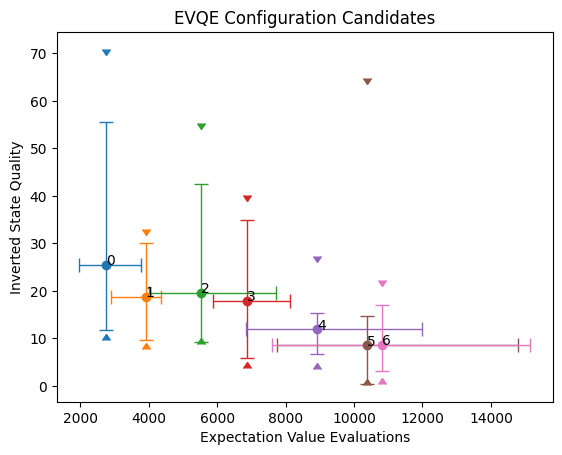

In [11]:
evqe_history = load_smac_runhistory("evqe_smac_run_1705_1", 0)
incumbent_ids = [183, 74, 190, 178, 199, 200, 75] 

filepath = Path(Path(), "evqe_smac_candidates.pdf")
plot_pareto_plane(evqe_history, incumbent_ids, "EVQE Configuration Candidates", "tab10", filepath=filepath)

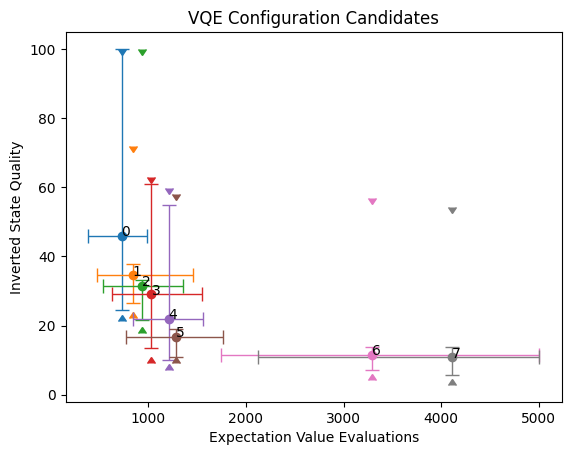

In [8]:
vqe_history = load_smac_runhistory("vqe_smac_run_1205_2", 0)
incumbent_ids = [133, 19, 47, 64, 134, 113, 67, 105]

filepath = Path(Path(), "vqe_smac_candidates.pdf")
plot_pareto_plane(vqe_history, incumbent_ids, "VQE Configuration Candidates", "tab10", filepath=filepath)

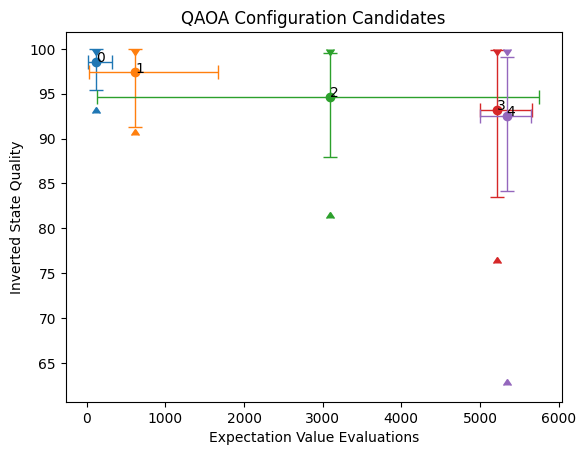

In [7]:
qaoa_history = load_smac_runhistory("qaoa_smac_run_1205_2", 0)
incumbent_ids = [25, 127, 74, 210, 195]

filepath = Path(Path(), "qaoa_smac_candidates.pdf")
plot_pareto_plane(qaoa_history, incumbent_ids, "QAOA Configuration Candidates", "tab10", filepath=filepath)